In [13]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import zipfile
zip_path = '/content/drive/MyDrive/Data_Snakes.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

img_path = '/content/Data_Snakes/train_all/venomous/Image_venom_001.jpg'
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

aug_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

aug_iterator = aug_gen.flow(img_array, batch_size=1)

augmented_images = [next(aug_iterator)[0] for _ in range(8)]

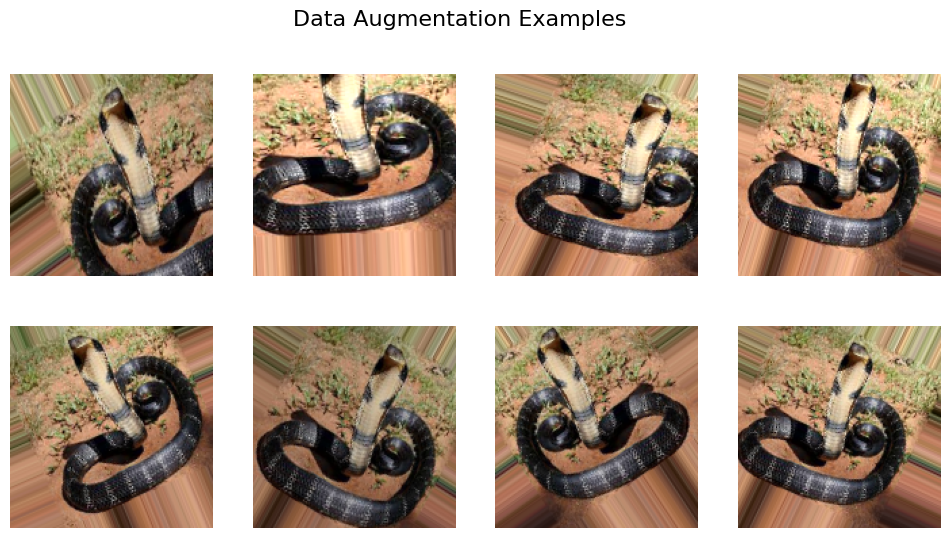

In [17]:
# EDA visualization
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle("Data Augmentation Examples", fontsize=16)
plt.show()